In [106]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(readr)
library(forcats)
library(reshape2)
library("dplyr")
library("foreign")
library("data.table")
library("car")
library(semPlot)
library(lavaan)
library(factoextra)

In [107]:
data <- read_csv("robert123.csv", show_col_types = FALSE)
categorical_columns <- c(
  "Gender", "Industry", "FamilyStatus",
  "Location",  "ManagingRole"
)
numeric_columns <- c(
  "Age","Experience", "Commuting", "WorkEfficiency", "Housework", "FamilyTime",
  "RemoteWorkExtent", "RemoteWorkSupport", "Productivity",
  "InterpersonalRelationships", "SocialIsolation", "Sleep",
  "EconomicResources", "RemoteWorkCompatability", "Motivation",
  "PhysicalEnvironment", "Wellbeing", "MentalHealth", "PhysicalHealth",
  "Sociability"
)

In [108]:
data[numeric_columns] <- lapply(data[numeric_columns], scale)

In [109]:
# scree.plot(data[numeric_columns])

In [110]:
library("psych")
library("psy")
library("tidyverse") 

correlation_matrix <- cor(data[numeric_columns], use = "complete.obs")

data <- na.omit(data)


pr_ititial <- principal(correlation_matrix,
    nfactors = 7,
    rotate = "varimax"
)
# h2 - communalities
print(pr_ititial$Structure, digits=3, cutoff = 0.4, sort = T)


Loadings:
                           RC1    RC2    RC3    RC6    RC4    RC7    RC5   
SocialIsolation             0.742                                          
EconomicResources           0.710                                          
RemoteWorkCompatability     0.713                                          
Motivation                  0.723                                          
PhysicalEnvironment         0.787                                          
Wellbeing                   0.757                                          
Productivity                       0.688                                   
MentalHealth                       0.768                                   
PhysicalHealth                     0.769                                   
Commuting                                 0.870                            
FamilyTime                               -0.705                            
RemoteWorkExtent                                 0.758                     
R

In [119]:
library(lavaan)

model <- '
  RemoteWorkChallenges =~ RemoteWorkCompatability + Motivation + WorkEfficiency 
  WorkOutcomes =~  MentalHealth + PhysicalHealth 
  RemoteWorkOrganization =~ RemoteWorkExtent + RemoteWorkSupport + RemoteWorkCompatability 
  WorkLifeBalance =~ Commuting + FamilyTime + RemoteWorkExtent +  Motivation 
  FamilyStage =~ Age + Commuting + WorkEfficiency + FamilyTime 
  PerformanceEfficiency =~ WorkEfficiency + FamilyTime + Motivation

  # Structural Model
  # Direct Effects
  MentalHealth ~ RemoteWorkChallenges + WorkLifeBalance + PerformanceEfficiency  
  
  # Indirect Effects (optional)
  WorkOutcomes ~ RemoteWorkChallenges + RemoteWorkOrganization + WorkLifeBalance + FamilyStage
  
  # Covariances
  RemoteWorkChallenges ~~ Commuting
'

fit <- sem(model, data = data[numeric_columns])

chisq_value <- fitMeasures(fit, "chisq")
df <- fitMeasures(fit, "df")
p_value <- fitMeasures(fit, "pvalue")

# Print the results
cat("Chi-square value:", chisq_value, "\n")
cat("Degrees of freedom:", df, "\n")
cat("P-value:", p_value, "\n")

summary(fit, fit.measures = TRUE)

varTable(fit)

Warning message in lav_object_post_check(object):
"lavaan WARNING: some estimated ov variances are negative"


Chi-square value: 2.893943 
Degrees of freedom: 8 
P-value: 0.9408357 


lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
RemoteWorkChallenges,=~,RemoteWorkCompatability,0,1.000000000,0.00000000,NA,NA
RemoteWorkChallenges,=~,Motivation,0,-4.719803929,10.02885624,-0.47062235,6.379104e-01
RemoteWorkChallenges,=~,WorkEfficiency,0,9.533431539,16.99866755,0.56083405,5.749107e-01
WorkOutcomes,=~,MentalHealth,0,1.000000000,0.00000000,NA,NA
WorkOutcomes,=~,PhysicalHealth,0,0.806061549,0.11708860,6.88420177,5.811351e-12
RemoteWorkOrganization,=~,RemoteWorkExtent,0,1.000000000,0.00000000,NA,NA
RemoteWorkOrganization,=~,RemoteWorkSupport,0,1.492776442,0.22990787,6.49293312,8.418111e-11
RemoteWorkOrganization,=~,RemoteWorkCompatability,0,0.147348571,0.22938864,0.64235339,5.206438e-01
WorkLifeBalance,=~,Commuting,0,1.000000000,0.00000000,NA,NA


,name,idx,nobs,type,exo,user,mean,var,nlev,lnam
,<chr>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>
1,RemoteWorkCompatability,14,1420,numeric,0,0,-2.467877e-18,1,0,
2,Motivation,15,1420,numeric,0,0,-6.271048e-17,1,0,
3,WorkEfficiency,4,1420,numeric,0,0,-6.543198e-19,1,0,
4,MentalHealth,18,1420,numeric,0,0,1.405813e-16,1,0,
5,PhysicalHealth,19,1420,numeric,0,0,5.093536e-18,1,0,
6,RemoteWorkExtent,7,1420,numeric,0,0,1.142824e-16,1,0,
7,RemoteWorkSupport,8,1420,numeric,0,0,1.497034e-16,1,0,
8,Commuting,3,1420,numeric,0,0,-4.963749e-17,1,0,
9,FamilyTime,6,1420,numeric,0,0,-2.554514e-17,1,0,


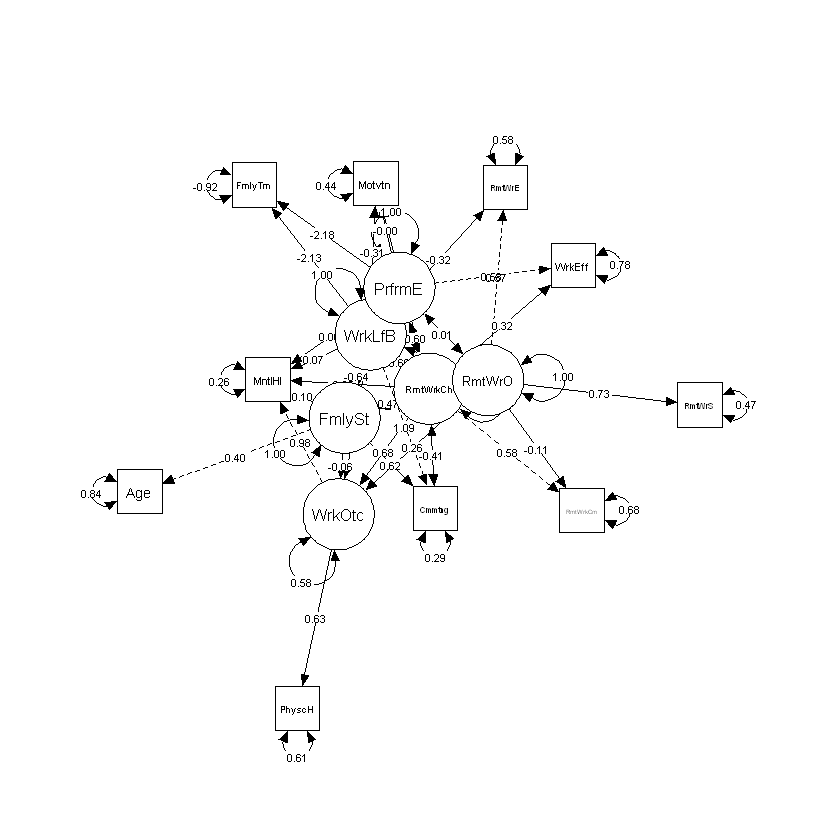

In [ ]:
library(semPlot)

semPaths(fit, whatLabels = "std", layout = "spring", edge.color = "black", 
         title = TRUE, nCharNodes = 6)